In [6]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
#import pydotplus
import networkx as nx
from networkx.drawing import nx_agraph
import pygraphviz
import re
from sklearn import svm

In [2]:
d = {
    "class": {
        "feature-type": "categorical",
        "values": {
            0: "died",
            1: "survived"
        },
        "data-type": "string"
    },
    "Pclass": {
        "feature-type": "categorical",
        "values": {
            0: "First",
            1: "Second",
            2: "Third"
        },
        "data-type": "string"
    },
    "Sex": {
        "feature-type": "categorical",
        "values": {
            0: "Male",
            1: "Female"
        },
        "data-type": "string"
    },
    "Age": {
        "feature-type": "continuous",
        "regex": "(\\d+)",
        "values": {"min": 0, "max": 90},
        "data-type": "integer"
    },
    "Fare": {
        "feature-type": "continuous",
        "regex": "(\\d+)(\\.\\d+)?",
        "values": {"min": 0, "max": 512},
        "data-type": "float"
    },
    "Embarked": {
        "feature-type": "categorical",
        "values": {
            0: "Southampton",
            1: "Cherbourg",
            2: "Queenstown"
            },
        "data-type": "string"
    },
    "Relatives": {
        "feature-type": "continuous",
        "regex": "(\\d+)",
        "values": {"min": 0, "max": 10},
        "data-type": "integer"
    }
}

In [3]:
data = pd.read_csv('titanic.csv')
data.rename(columns={'Survived': 'class'}, inplace=True)
data['Sex'] = data['Sex'].map({'male':'Male','female':'Female'})
data['Embarked'] = data['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})
data['Pclass'] = data['Pclass'].map({1:'First', 2:'Second', 3:'Third'})
data['Relatives'] = data['SibSp'] + data['Parch']

data = data.drop(['PassengerId', 'Name','Ticket','Cabin', 'SibSp', 'Parch'], axis=1)
data = data.dropna()

f = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Relatives']

features = data.drop('class', axis=1)
#print(features)

training_features, testing_features, training_target, testing_target = \
    train_test_split(features, data['class'].values, random_state=None)

In [4]:
numeric_features = ['Age', 'Fare', 'Relatives']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [7]:
model = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', svm.SVC(probability=True))])

In [8]:
model.fit(training_features, training_target)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxScaler(copy=True,
                                                                                feature_range=(0,
                                                                                               1)))],
                                                           verbose=False),
                                                  ['Age', 'Fare', 'Relatives']),
                                                 ('cat',
                                                  P

In [9]:
print("XGB {}".format(accuracy_score(testing_target, model.predict(testing_features))))

XGB 0.797752808988764


In [10]:
tree_prediction_train = model.predict(training_features)
tree_prediction_test = model.predict(testing_features)

In [11]:
tree_train = training_features.copy()
tree_train['Sex'] = training_features['Sex'].map({'Male':0,'Female':1})
tree_train['Embarked'] = training_features['Embarked'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})
tree_train['Pclass'] = training_features['Pclass'].map({'First':0, 'Second':1, 'Third':2})

In [12]:
print(tree_train)

Pclass  Sex   Age      Fare  Embarked  Relatives
609       0    1  40.0  153.4625         0          0
163       2    0  17.0    8.6625         0          0
162       2    0  26.0    7.7750         0          0
20        1    0  35.0   26.0000         0          0
74        2    0  32.0   56.4958         0          0
..      ...  ...   ...       ...       ...        ...
199       1    1  24.0   13.0000         0          0
294       2    0  24.0    7.8958         0          0
744       2    0  31.0    7.9250         0          0
352       2    0  15.0    7.2292         1          2
118       0    0  24.0  247.5208         1          1

[534 rows x 6 columns]


In [13]:
tree = DecisionTreeClassifier(max_depth = 3)

In [14]:
tree.fit(tree_train, tree_prediction_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(111.60000000000001, 190.26, 'Sex <= 0.5\ngini = 0.38\nsamples = 534\nvalue = [398, 136]\nclass = died'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 341\nvalue = [341, 0]\nclass = died'),
 Text(167.4, 135.9, 'Pclass <= 1.5\ngini = 0.416\nsamples = 193\nvalue = [57, 136]\nclass = survived'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]\nclass = survived'),
 Text(223.20000000000002, 81.53999999999999, 'Embarked <= 0.5\ngini = 0.393\nsamples = 78\nvalue = [57, 21]\nclass = died'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]\nclass = died'),
 Text(279.0, 27.180000000000007, 'gini = 0.087\nsamples = 22\nvalue = [1, 21]\nclass = survived')]

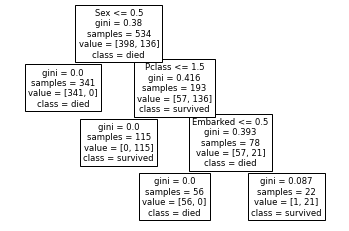

In [15]:
sklearn.tree.plot_tree(tree, feature_names=f, class_names=["died", "survived"])

In [17]:
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=f,  
                                impurity=False,
                                label='none',
                                filled=True,
                                rotate=True,
                                class_names=["died","survived"])

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  

#graph.write_png("tree.png")
#print(dot_data)

In [13]:
def tree_to_rules(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    global rules 
    rules = []

    def recurse(left, right, threshold, features, node, depth=0, k = []):
        if (threshold[node] != -2):
            if(left[node] != -1):
                z = k.copy() 
                if(d[features[node]]["feature-type"] == "categorical"):
                    instances = dict(filter(lambda elem: elem[0] <= threshold[node], d[features[node]]["values"].items()))
                    c = []  
                    c.append(str(features[node]))
                    c.append("in")
                    c.append(list(instances.values()))
                    z.append(c)
                else:  
                    c = []
                    c.append(str(features[node]))
                    c.append("<=")
                    c.append(str(threshold[node]))
                    z.append(c)
                recurse(left, right, threshold, features, left[node], depth+1, z)   
            if(right[node] != -1):
                z = k.copy() 
                if(d[features[node]]["feature-type"] == "categorical"):
                    instances = dict(filter(lambda elem: elem[0] > threshold[node], d[features[node]]["values"].items()))
                    c = []
                    c.append(str(features[node]))
                    c.append("in")
                    c.append(list(instances.values()))
                    z.append(c)
                else:
                    c = []
                    c.append(str(features[node]))
                    c.append(">")
                    c.append(str(threshold[node]))
                    z.append(c)
                recurse(left, right, threshold, features, right[node], depth+1, z)
        else:
            rules.append((k, value[node]))
    
    recurse(left, right, threshold, features, node = 0)
    return(rules)

In [90]:
print(tree.tree_.children_left)
print(tree.tree_.children_right)
print(tree.tree_.threshold)
print([f[i] for i in tree.tree_.feature])
print(tree.tree_.value)

[ 1  2  3 -1 -1  6 -1 -1  9 -1 11 -1 -1]
[ 8  5  4 -1 -1  7 -1 -1 10 -1 12 -1 -1]
[ 0.5        13.          3.5        -2.         -2.         26.26875019
 -2.         -2.          1.5        -2.         20.80000019 -2.
 -2.        ]
['Sex', 'Age', 'Relatives', 'Embarked', 'Embarked', 'Fare', 'Embarked', 'Embarked', 'Pclass', 'Embarked', 'Fare', 'Embarked', 'Embarked']


In [14]:
rules = tree_to_rules(tree,f)
print(rules)

[([['Sex', 'in', ['Male']], ['Age', '<=', '13.0'], ['Relatives', '<=', '3.5']], array([[ 0., 16.]])), ([['Sex', 'in', ['Male']], ['Age', '<=', '13.0'], ['Relatives', '>', '3.5']], array([[13.,  0.]])), ([['Sex', 'in', ['Male']], ['Age', '>', '13.0'], ['Fare', '<=', '54.27084922790527']], array([[258.,   7.]])), ([['Sex', 'in', ['Male']], ['Age', '>', '13.0'], ['Fare', '>', '54.27084922790527']], array([[26., 11.]])), ([['Sex', 'in', ['Female']], ['Pclass', 'in', ['First', 'Second']]], array([[  0., 123.]])), ([['Sex', 'in', ['Female']], ['Pclass', 'in', ['Third']], ['Fare', '<=', '23.087499618530273']], array([[26., 41.]])), ([['Sex', 'in', ['Female']], ['Pclass', 'in', ['Third']], ['Fare', '>', '23.087499618530273']], array([[13.,  0.]]))]


In [15]:
def getSortedRules(rules):
    def getScore(rule):
        bigger = [i for i, j in enumerate(rule[1][0]) if j == max(rule[1][0])]
        return((rule[1][0][bigger])/(sum(rule[1][0])+1))
    return(sorted(rules, key=getScore)[::-1])

In [16]:
def getPrettyRule(rule):
    string = ""
    for r in rule:
        if string != "":
            string = string + " AND "
        if type(r[2]) == list:
            string = string +  r[0] + " " + r[1] + " " +  "( " + ', '.join(r[2]) + " )"
        else:
            string = string + r[0] + " " + r[1] + " " + r[2]
    return(string)


In [17]:
def getKthTargetRule(rules, target, k):
    counter = 1
    for r in rules:
        rule_target = [i for i, j in enumerate(r[1][0]) if j == max(r[1][0])][0]
        if counter == k and target == rule_target:
            return r
        elif counter != k and target == rule_target:
            counter = counter + 1
    return None

In [26]:
sorted_rules = getSortedRules(rules)
print(getPrettyRule(sorted_rules[0][0]))
print(sorted_rules)
print(getKthTargetRule(sorted_rules, 0, 1))
print(getKthTargetRule(sorted_rules, 0, 2))
print(getKthTargetRule(sorted_rules, 0, 3))
print(getKthTargetRule(sorted_rules, 0, 4))
print(getKthTargetRule(sorted_rules, 0, 5))[0]

Sex in ( Female ) AND Pclass in ( First, Second )
[([['Sex', 'in', ['Female']], ['Pclass', 'in', ['First', 'Second']]], array([[  0., 123.]])), ([['Sex', 'in', ['Male']], ['Age', '>', '13.0'], ['Fare', '<=', '54.27084922790527']], array([[258.,   7.]])), ([['Sex', 'in', ['Male']], ['Age', '<=', '13.0'], ['Relatives', '<=', '3.5']], array([[ 0., 16.]])), ([['Sex', 'in', ['Female']], ['Pclass', 'in', ['Third']], ['Fare', '>', '23.087499618530273']], array([[13.,  0.]])), ([['Sex', 'in', ['Male']], ['Age', '<=', '13.0'], ['Relatives', '>', '3.5']], array([[13.,  0.]])), ([['Sex', 'in', ['Male']], ['Age', '>', '13.0'], ['Fare', '>', '54.27084922790527']], array([[26., 11.]])), ([['Sex', 'in', ['Female']], ['Pclass', 'in', ['Third']], ['Fare', '<=', '23.087499618530273']], array([[26., 41.]]))]
([['Sex', 'in', ['Male']], ['Age', '>', '13.0'], ['Fare', '<=', '54.27084922790527']], array([[258.,   7.]]))
([['Sex', 'in', ['Female']], ['Pclass', 'in', ['Third']], ['Fare', '>', '23.0874996185302

TypeError: 'NoneType' object is not subscriptable

In [79]:
g = nx.DiGraph()
g.add_node("1", label = "Pclass", style="filled", fillcolor="green")
g.add_node("2", label = "4[0,3,3]1 E:0.5")
g.add_node("3", label = "3[0,3,2]0 E:0.0")

g.add_edges_from([("1", "2")], label = "First")
g.add_edges_from([("1", "3")], label = "Second, Third")
p=nx.drawing.nx_pydot.to_pydot(g)
#p.write_png('test.png')

print("1" not in g.nodes())

False


In [19]:
graph = nx_agraph.from_agraph(pygraphviz.AGraph(dot_data))

In [34]:
p=nx.drawing.nx_pydot.to_pydot(g1)
p.write_png('test.png')

In [18]:
def categorize_dot(dot):
    new_dot = dot
    feature_list = []
    for features in f:
            if d[features]["feature-type"] == "categorical" and features != "class":
                feature_list.append(features)
    print(feature_list)

    for fe in feature_list: 
        m = re.findall('label="'+ fe +'(.+?)\\\\n', new_dot)
        print(m)
        if m != []:
            for k in m:
                if '<=' in m[0]:
                    number = float(re.findall("\d+\.\d+", k)[0])
                    instances = dict(filter(lambda elem: elem[0] <= number, d[fe]["values"].items()))
                    print(number)
                    print(instances)
                else: 
                    number = float(re.findall("\d+\.\d+", k)[0])
                    instances = dict(filter(lambda elem: elem[0] > number, d[fe]["values"].items()))
                    print(number)
                    print(instances)
            print(list(instances.values()))
            new_dot = new_dot.replace(fe+k, fe+ " in " +str(list(instances.values())))
            # replace fe+k by fe+instances.values()
    return(new_dot)


In [19]:
c = categorize_dot(dot_data)

['Pclass', 'Sex', 'Embarked']
[' <= 1.5']
1.5
{0: 'First', 1: 'Second'}
['First', 'Second']
[' <= 0.5']
0.5
{0: 'Male'}
['Male']
[' <= 0.5']
0.5
{0: 'Southampton'}
['Southampton']


In [24]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
rankdir=LR ;
0 [label="Sex <= 0.5\n534\n[398, 136]\ndied", fillcolor="#eeac7d"] ;
1 [label="341\n[341, 0]\ndied", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;
2 [label="Pclass <= 1.5\n193\n[57, 136]\nsurvived", fillcolor="#8cc6f0"] ;
0 -> 2 [labeldistance=2.5, labelangle=45, headlabel="False"] ;
3 [label="115\n[0, 115]\nsurvived", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="Embarked <= 0.5\n78\n[57, 21]\ndied", fillcolor="#efaf82"] ;
2 -> 4 ;
5 [label="56\n[56, 0]\ndied", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="22\n[1, 21]\nsurvived", fillcolor="#42a2e6"] ;
4 -> 6 ;
}


In [22]:
print(c)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
rankdir=LR ;
0 [label="Sex in ['Male']\n534\n[398, 136]\ndied", fillcolor="#eeac7d"] ;
1 [label="341\n[341, 0]\ndied", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;
2 [label="Pclass in ['First', 'Second']\n193\n[57, 136]\nsurvived", fillcolor="#8cc6f0"] ;
0 -> 2 [labeldistance=2.5, labelangle=45, headlabel="False"] ;
3 [label="115\n[0, 115]\nsurvived", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="Embarked in ['Southampton']\n78\n[57, 21]\ndied", fillcolor="#efaf82"] ;
2 -> 4 ;
5 [label="56\n[56, 0]\ndied", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="22\n[1, 21]\nsurvived", fillcolor="#42a2e6"] ;
4 -> 6 ;
}


In [47]:
from graphviz import Source
s = Source(c, filename="test.gv", format="png")
s.render()

'test.gv.png'

In [26]:
graph = nx_agraph.from_agraph(pygraphviz.AGraph(c))
p=nx.drawing.nx_pydot.to_pydot(graph)
p.write_png('test.png')

RuntimeError: generator raised StopIteration

In [44]:
print(p)

digraph "Tree" {
rankdir=LR;
node [color=black, fillcolor="", label="", shape=box, style=filled];
edge [headlabel="", labelangle="", labeldistance=""];
0 [fillcolor="#f2be9a", label="Sex in ['Male']\n534\n[359, 175]\ndied"];
1 [fillcolor="#e78d4c", label="Age <= 6.5\n350\n[320, 30]\ndied"];
2 [fillcolor="#d7ebfa", label="Relatives <= 3.5\n18\n[8, 10]\nsurvived"];
3 [fillcolor="#399de5", label="10\n[0, 10]\nsurvived"];
4 [fillcolor="#e58139", label="8\n[8, 0]\ndied"];
5 [fillcolor="#e78946", label="Fare <= 26.338\n332\n[312, 20]\ndied"];
6 [fillcolor="#e5823a", label="237\n[236, 1]\ndied"];
7 [fillcolor="#eca06a", label="95\n[76, 19]\ndied"];
8 [fillcolor="#6eb7ec", label="Pclass in ['First', 'Second']\n184\n[39, 145]\nsurvived"];
9 [fillcolor="#399de5", label="114\n[0, 114]\nsurvived"];
10 [fillcolor="#fae5d6", label="Relatives <= 3.5\n70\n[39, 31]\ndied"];
11 [fillcolor="#d7ebfa", label="54\n[24, 30]\nsurvived"];
12 [fillcolor="#e78946", label="16\n[15, 1]\ndied"];
0 -> 1  [headlabel=

In [19]:
k = {0: 'First'}

In [21]:
print(list(k.values()))

['First']
